In [23]:
#import the libraries 
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
from tensorflow.keras import models

In [33]:
# Loading the tensorflow model
model = models.load_model("emotion_detection_model.h5")
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 24, 24, 32)      

In [51]:
emotion_encodes = np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

I found 2 face(s) in this photograph.


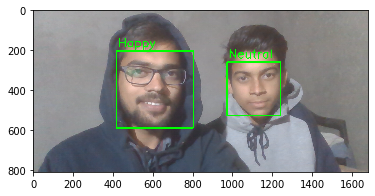

In [93]:
# Load the jpg file into a NumPy array
image = cv2.imread("test_images/test_image1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

for face_location in face_locations:
    top, right, bottom, left = face_location
    face = np.array([np.reshape(cv2.resize(gray[top:bottom,left:right], (48,48)), (48,48,1))])
    model_prob = model.predict(face)
    text = emotion_encodes[np.where(model_prob[0] == max(model_prob[0]))[0][0]]
    cv2.rectangle(image, (left,top), (right,bottom), (0,255,0), 5)
    cv2.putText(image, text, (left+7,top-20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 4, cv2.LINE_AA)

# Display the image on screen
plt.imshow(image)
plt.show()

In [94]:
cv2.imwrite('out_test_image.jpg',image)

True